In [1]:
# Ref: https://github.com/jupyter/notebook/issues/1290#issuecomment-204388895
# %env LD_LIBRARY_PATH=$PWD/../../../lib/:$LD_LIBRARY_PATH

## Testing Hopfield model on CIFAR-10 dataset

As for the BCM model, we can move to a more complex dataset (CIFAR-10) also for the Hopfield model.

In the work of [Krotov et al.](https://www.pnas.org/content/116/16/7723) the authors showed very promising results on the application of their model to the CIFAR-10 dataset.

Lets try to reproduce the same learning using the implementation provided in the `plasticity` package.

In [36]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

shape = x_train.shape[1:]
X = x_train.reshape(x_train.shape[0], -1)
X = X.astype(float)
X *= 1. / 255

x_train.shape

(50000, 32, 32, 3)

For the BCM model we have seen that the model parameters need to be tuned according to the complexity of this dataset.
Lets start from the same parameters chosen for the BCM model also in this case.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


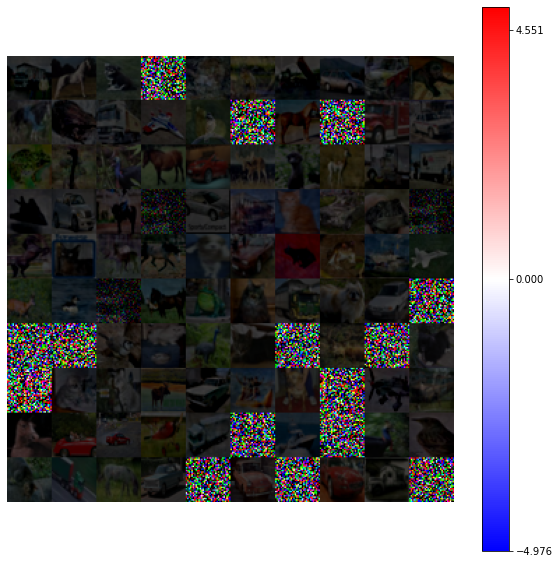

CPU times: user 9min 20s, sys: 13min 38s, total: 22min 59s
Wall time: 1min 29s


In [20]:
%%time
from plasticity.model import Hopfield

from plasticity.utils import view_weights

model = Hopfield(outputs=100, num_epochs=1000, 
                 batch_size=10, verbose=False,
                 random_state=42, p=4)
model.fit(X[:100])

view_weights(model.weights, dims=(32, 32, 3))

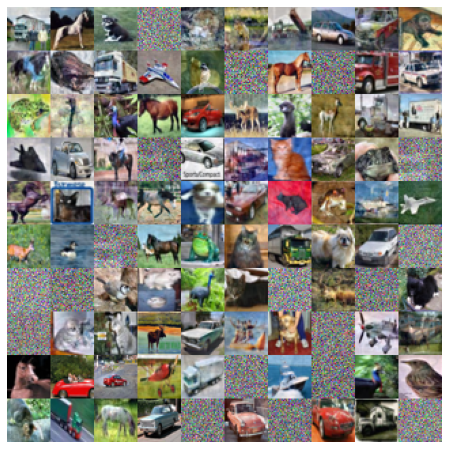

In [35]:
import numpy as np
import pylab as plt

num_images = int(np.sqrt(model.weights.shape[0]))
selected_weights = model.weights[:num_images**2]
m = selected_weights.min(axis=1, keepdims=True)
M = selected_weights.max(axis=1, keepdims=True)
selected_weights = (selected_weights - m) * (1. / (M - m))

image = np.hstack(np.hstack(selected_weights.reshape(num_images, num_images, *shape)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.axis('off')
im = ax.imshow(image)

CPU times: user 9min 22s, sys: 13min 48s, total: 23min 10s
Wall time: 1min 29s


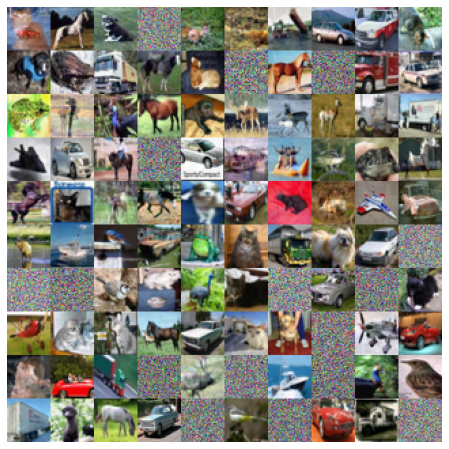

In [50]:
%%time
Y = x_train[...].reshape(x_train.shape[0], -1)
Y = Y.astype(float)
#Y *= 1. / 255

model = Hopfield(outputs=100, num_epochs=1000, 
                 batch_size=10, verbose=False,
                 random_state=42, p=4, delta=0.2)
model.fit(Y[:100])

num_images = int(np.sqrt(model.weights.shape[0]))
shape = (32, 32, 3)
selected_weights = model.weights[:num_images**2]
m = selected_weights.min(axis=1, keepdims=True)
M = selected_weights.max(axis=1, keepdims=True)
selected_weights = (selected_weights - m) * (1. / (M - m))

image = np.hstack(np.hstack(selected_weights.reshape(num_images, num_images, *shape)))
nc = np.max(np.abs(selected_weights))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.axis('off')
im = ax.imshow(image)